In [81]:
import cv2
from matplotlib import pyplot
import numpy
from scipy.fftpack import dct
from scipy.fftpack import idct
import struct
import zlib

# Zadanie 1

In [82]:
#
# PPM file header
#
ppm_ascii_header = 'P3 100 100 255 '# TODO: implement
ppm_binary_header ='P6 100 100 255 ' # TODO: implement

#
# Image data
#
#image = numpy.array([], dtype=numpy.uint8)  # TODO: implement
image = numpy.zeros((100, 100, 3)).astype('uint8')
image[:] = [0, 255, 255]


# Save the PPM image as an ASCII file
#
with open('lab4-ascii.ppm', 'w') as fh:
    fh.write(ppm_ascii_header)
    image.tofile(fh, sep=' ')
    fh.write('\n')

#
# Save the PPM image as a binary file
#
with open('lab4-binary.ppm', 'wb') as fh:
    fh.write(bytearray(ppm_binary_header, 'ascii'))
    image.tofile(fh)

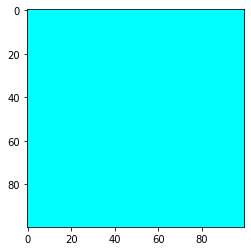

In [83]:
#
# Display image
#
image_from_file = cv2.imread('lab4-ascii.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

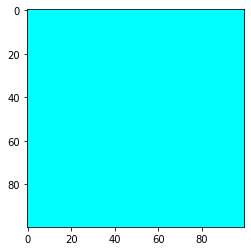

In [84]:
#
# Display image
#
image_from_file = cv2.imread('lab4-binary.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 2

In [85]:
ppm_ascii_header = 'P3 1785 100 255\n'
width, height = map(int, ppm_ascii_header.split()[1:3])

rainbow = numpy.zeros((height, width, 3)).astype('uint8')
color = [0, 0, 0]
for i in range(0, 7*255):
    rainbow[:100,i,:] = color[0:3]
    if i < 255:
        color = numpy.add(color,[0, 0, 1])
    elif 255 <= i < 2*255:
        color = numpy.add(color,[0, 1, 0])
    elif 2*255 <= i < 3*255:
        color = numpy.add(color,[0, 0, -1])
    elif 3*255 <= i < 4*254:
        color = numpy.add(color,[1, 0, 0])
    elif 4*255 < i <= 5*255:
        color = numpy.add(color,[0, -1, 0])
    elif 5*255 < i <= 6*255:
        color = numpy.add(color,[0, 0, 1])
    elif 6*255 < i <= 7*255:
        color = numpy.add(color,[0, 1, 0])
    
    
with open('lab4-rainbow.ppm', 'w') as fh:
    fh.write(ppm_ascii_header)
    rainbow.tofile(fh, sep=' ')
    fh.write('\n')

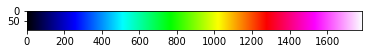

In [86]:
#
# Display image
#
image_from_file = cv2.imread('lab4-rainbow.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 3

In [87]:
#
# Image data
#

image = rainbow  # TODO: implement

#
# Construct signature
#
png_file_signature = b'\x89PNG\r\n\x1a\n'  # TODO: implement

# Construct header
#
header_id = b'IHDR'  # TODO: implement
header_content = bytes.fromhex('000006F9000000640802000000')   # TODO: implement
header_size = struct.pack('!I', len(header_content))  # TODO: implement
header_crc = struct.pack('!I', zlib.crc32(header_id + header_content))  # TODO: implement
    
png_file_header = header_size + header_id + header_content + header_crc


#
# Construct data
#

data_id = b'IDAT'  # TODO: implement
data_content = zlib.compress(b''.join([b'\x00' + bytes(row) for row in image])) 
#bytes.fromhex('081D010A00F5FF') +    + bytes.fromhex('0EFB02FE')
data_size = struct.pack('!I', len(data_content))  # TODO: implement
data_crc = struct.pack('!I', zlib.crc32(data_id + data_content))  # TODO: implement
png_file_data = data_size + data_id + data_content + data_crc

#
# Consruct end
#
end_id = b'IEND'
end_content = b''
end_size = struct.pack('!I', len(end_content))
end_crc = struct.pack('!I', zlib.crc32(end_id + end_content))
png_file_end = end_size + end_id + end_content + end_crc


#
# Save the PNG image as a binary file
#
with open('lab4.png', 'wb') as fh:
    fh.write(png_file_signature)
    fh.write(png_file_header)
    fh.write(png_file_data)
    fh.write(png_file_end)

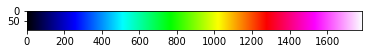

In [88]:
#
# Display image
#
image_from_file = cv2.imread('lab4.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Funkcje pomocnicze do zadań 4 i 5

In [89]:
#
# 2d Discrete Cosinus Transform
#
def dct2(array):
    return dct(dct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


def idct2(array):
    return idct(idct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


#
# Calculate quantisation matrices
#
# Based on: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/jpegUpToQuant.html
#           #step-3-and-4-discrete-cosinus-transform-and-quantisation
#
_QY = numpy.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 48, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

_QC = numpy.array([[17, 18, 24, 47, 99, 99, 99, 99],
                   [18, 21, 26, 66, 99, 99, 99, 99],
                   [24, 26, 56, 99, 99, 99, 99, 99],
                   [47, 66, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99]])


def _scale(QF):
    if QF < 50 and QF >= 1:
        scale = numpy.floor(5000 / QF)
    elif QF < 100:
        scale = 200 - 2 * QF
    else:
        raise ValueError('Quality Factor must be in the range [1..99]')

    scale = scale / 100.0
    return scale


def QY(QF=85):
    return _QY * _scale(QF)


def QC(QF=85):
    return _QC * _scale(QF)

# Zadania 4 i 5

In [90]:
#
# 0. Image data
#
# TODO: implement (zad. 4)

#
# 1. Convert RGB to YCbCr
#
# TODO: implement (zad. 4)

#
# 2. Downsampling on Cb and Cr channels
#
# TODO: implement (zad. 4)

#
# 3. Produce 8x8 blocks
#
# TODO: implement (zad. 4)

#
# 4. Calculate DCT on each block
#
# TODO: implement (zad. 5)

#
# 5. Divide each block by quantisation matrix
#
# TODO: implement (zad. 5)

#
# 6. Round values in each block to integers
#
# TODO: implement (zad. 5)

#
# 7. Zig Zag
#
# TODO: implement (zad. 4)

#
# 8. Flatten, concatenate, compress and calculate the size -- how many bytes?
#
# TODO: implement (zad. 4)

#
# 7'. Undo Zig Zag
#
# We can skip it in this exercise! We did Zig Zag only for analysis in step 8.
# You can continue with result from step 6. instead of implementing undo here.
#

#
# 6'. Nothing to do here   ¯\_(ツ)_/¯
#
# No conversion is really needed here, just proceed to the next step.
#

#
# 5'. Reverse division by quantisation matrix -- multiply
#
# TODO: implement (zad. 5)

#
# 4'. Reverse DCT
#
# TODO: implement (zad. 5)

#
# 3'. Combine 8x8 blocks to original image
#
# TODO: implement (zad. 4)

#
# 2'. Upsampling on Cb and Cr channels
#
# TODO: implement (zad. 4)

#
# 1'. Convert YCbCr to RGB
#
# TODO: implement (zad. 4)

#
# 0'. Save the decoded image -- as PPM or PNG
#
# TODO: implement (zad. 4)

In [91]:
#
# Display image
#
image_from_file = cv2.imread('lab4-po-kompresji-i-dekompresji-jpeg.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Obserwacje z zadań 4 i 5